In [102]:
!pip install plotly

In [103]:
import statsmodels.api as sm
import time

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

from statsmodels.formula.api import ols
from datetime import datetime
from geopy.geocoders import Nominatim
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import pingouin
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [104]:
clf = linear_model.LinearRegression()


In [105]:
# get training

df = pd.read_csv('data/clean/zhome_value.csv')
df["year"] = pd.to_datetime(df.year.astype(str)).dt.year

# Split by before and after 2015 

post_airbnb_df = df[df["year"] >= 2008].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] < 2008].sort_values(by="year", ascending=True)

In [106]:
pre_airbnb_df.head()

,zipcode,state,city,borough,year,home_value
0,11368,NY,New York,QUEENS,2002,249885.0
1288,11377,NY,New York,QUEENS,2002,323569.0
1287,11223,NY,New York,BROOKLYN,2002,369713.0
1286,11235,NY,New York,BROOKLYN,2002,259932.0
1285,10458,NY,New York,BRONX,2002,199240.0


In [107]:
# home_value = f(year)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf.fit(x_train, y_train)


LinearRegression()

In [108]:

pred = clf.predict(x_train)
mean_error = (abs(pred-y_train)/y_train).mean()
standard_deviation = (abs(pred-y_train)/y_train).std()

print('Training Error:')

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

print('Test Error:')

pred = clf.predict(x_test)
mean_error = (abs(pred-y_test)/y_test).mean()
standard_deviation = (abs(pred-y_test)/y_test).std()

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

Training Error:
Mean Error: 0.3856021630042228
Standard Deviation of Error: 0.35320179024993403
Test Error:
Mean Error: 1.003730655618565
Standard Deviation of Error: 0.8404538182067405


In [109]:
# print(list(y_train)[:5])
# print(list(x_train)[:5])
# print(list(y_test)[:5])
print(list(x_test)[:5])

[<PandasArray>
[2008]
Length: 1, dtype: int64, <PandasArray>
[2008]
Length: 1, dtype: int64, <PandasArray>
[2008]
Length: 1, dtype: int64, <PandasArray>
[2008]
Length: 1, dtype: int64, <PandasArray>
[2008]
Length: 1, dtype: int64]


In [115]:
# print(list(clf.predict(X_test))[:5])
type(x_test)

pandas.core.arrays.numpy_.PandasArray

In [117]:
x_test.reshape(clf.predict(x_test).shape)

<PandasArray>
[2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
 ...
 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022]
Length: 31256, dtype: int64

In [112]:
clf.predict(x_test).shape

(16577,)

<AxesSubplot: >

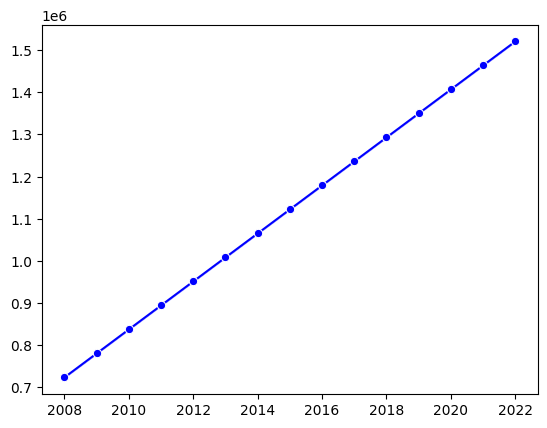

In [118]:
# success :) 
# this is the predictions 
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


In [132]:
home_value_df = df

In [140]:
home_value_df = home_value_df.groupby('year').mean().reset_index()
home_value_df

/var/folders/ht/q4d_vppn3x5d3_p7bs499mdh0000gn/T/ipykernel_14920/1271320138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_value_df = home_value_df.groupby('year').mean().reset_index()


,year,zipcode,home_value
0,2002,10844.331078,388185.197814
1,2003,10859.201878,427488.437141
2,2004,10847.042683,475856.334858
3,2005,10847.042683,563629.120427
4,2006,10833.730055,640005.374812
5,2007,10836.500000,642873.288725
6,2008,10835.700784,645294.235553
7,2009,10818.026807,611269.790330
8,2010,10813.988571,580224.588095
9,2011,10810.965909,595607.424716


<AxesSubplot: xlabel='Year', ylabel='home_value'>

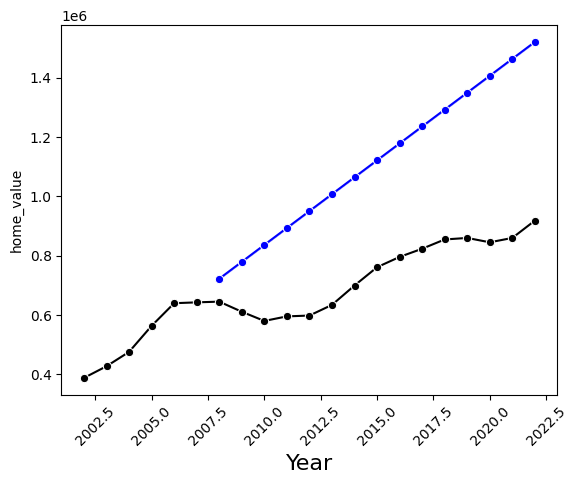

In [143]:
# next step, concatentate with the trend line 

# years_locator = mdates.YearLocator()
# months_locator = mdates.MonthLocator()
# years_format = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()

# ax.xaxis.set_major_locator(years_locator)
# ax.xaxis.set_major_formatter(years_format)
# ax.xaxis.set_minor_locator(months_locator)

rotation = 45
plt.setp(ax.get_xticklabels(), rotation=rotation)
# plt.title('United\'s Financials Through Time', fontsize='18')
plt.xlabel('Year', fontsize='16')

sns.lineplot(y = home_value_df["home_value"], x= home_value_df["year"], color='black', marker='o')
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')
